In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import pipeline

import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

# Skup podataka

In [2]:
data=pd.read_excel('Residential-Building-Data-set.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Columns: 109 entries, START YEAR to V-10
dtypes: float64(94), int64(15)
memory usage: 316.9 KB


In [3]:
data.describe()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,V-9,V-10
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,...,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,3.720000e+02,372.000000,372.000000
mean,81.483871,2.190860,82.951613,2.586022,9.728495,1729.044355,426.114247,327.904086,163.118280,554.419839,...,1187.484704,5403.213091,7431.560215,76.288817,73.446398,5915.576801,27551.883065,8.789713e+05,1387.432796,232.647849
std,4.182141,1.083382,4.223898,1.123442,6.563309,1802.371491,490.076498,563.544337,112.604343,275.105953,...,708.139788,3534.428753,2210.892779,39.507185,43.726005,4282.641116,13516.283345,5.067320e+05,1206.083047,162.627656
min,72.000000,1.000000,73.000000,1.000000,1.000000,200.000000,60.000000,3.700000,10.000000,193.080000,...,152.250000,1439.000000,1450.000000,9.730000,8.340000,354.550000,8194.000000,1.218572e+05,50.000000,20.000000
25%,78.000000,1.000000,80.000000,2.000000,4.000000,720.000000,190.000000,67.800000,80.000000,391.677500,...,669.800000,1755.000000,6714.000000,43.400000,36.450000,1917.437500,12065.000000,5.196798e+05,577.500000,110.000000
50%,82.000000,2.000000,84.000000,3.000000,8.000000,1220.000000,300.000000,164.700000,140.000000,522.455000,...,938.400000,7927.570000,8315.000000,72.565000,67.455000,4525.370000,25758.750000,6.592429e+05,1000.000000,190.000000
75%,85.000000,3.000000,87.000000,4.000000,17.000000,2100.000000,490.500000,366.050000,230.000000,667.905000,...,1795.300000,9000.910000,9022.000000,109.020000,112.000000,9821.000000,40234.000000,1.181856e+06,1700.000000,330.000000
max,88.000000,4.000000,90.000000,4.000000,20.000000,15670.000000,5000.000000,7208.200000,640.000000,3436.930000,...,3686.300000,9967.330000,10099.300000,190.500000,204.800000,13596.370000,49572.000000,2.435004e+06,6800.000000,1000.000000


In [4]:
data.shape

(372, 109)

In [5]:
X=data.drop(['V-9','V-10'],axis=1)
y=data['V-9']

In [6]:
X.head()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-20.4,V-21.4,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4
0,81,1,85,1,1,3150.0,920.0,598.5,190,1010.84,...,15,733.800000,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.0,601988.1
1,84,1,89,4,1,7600.0,1140.0,3040.0,400,963.81,...,15,1143.800000,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.0,929027.1
2,78,1,81,4,1,4800.0,840.0,480.0,100,689.84,...,15,589.500000,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.0,377828.6
3,72,2,73,2,1,685.0,202.0,13.7,20,459.54,...,12,197.679557,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.0,122031.7
4,87,1,90,2,1,3000.0,800.0,1230.0,410,631.91,...,14,2220.600000,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.0,1734973.5


In [7]:
y.head()

0    2200
1    5000
2    1200
3     165
4    5500
Name: V-9, dtype: int64

# Priprema podataka

In [8]:
X_train_validation, X_test, y_train_validation, y_test = \
    model_selection.train_test_split(X, y, test_size=0.33, random_state=7)

In [9]:
X_train, X_validation, y_train, y_validation =\
    model_selection.train_test_split(X_train_validation, y_train_validation, \
                                     test_size = 0.2, random_state=7)

In [10]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_validation_std = scaler.transform(X_validation)
X_train_validation_std=scaler.transform(X_train_validation)
X_test_std=scaler.transform(X_test)
#----------------------------------------------------------------------
minmax=preprocessing.MinMaxScaler()
minmax.fit(X_train)

X_train_minmax = minmax.transform(X_train)
X_validation_minmax = minmax.transform(X_validation)
X_train_validation_minmax=minmax.transform(X_train_validation)
X_test_minmax=minmax.transform(X_test)
#-----------------------------------------------------------------------
robust=preprocessing.RobustScaler()
robust.fit(X_train)

X_train_robust =robust.transform(X_train)
X_validation_robust = robust.transform(X_validation)
X_train_validation_robust=robust.transform(X_train_validation)
X_test_robust=robust.transform(X_test)



# Model (Standard Scaler)

In [11]:
lr=linear_model.LogisticRegression(solver='liblinear',max_iter=6000) 
lr.fit(X_train_validation_std,y_train_validation)
y_pred_lr=lr.predict(X_test_std)
print('Najbolji rezultat modela Logisticke regresije sa validacijom',metrics.r2_score(y_test,y_pred_lr))

Najbolji rezultat modela Logisticke regresije sa validacijom 0.49426924630288394


# 

In [16]:
Eps = [0.00001,0.0001,0.001,0.01,0.1,0,1,10,100,1000,10000]#np.array([10**i for i in range(-5, 5)])


best_score_lars = 0 
best_params_lars = {'eps':0}


# za sve kombinacije eps
for eps in Eps:
    # vrsimo ocenu modela na uniji trening i validacionog skupa koriscenjem 10-struke unakrsne validacije
    lars = linear_model.LarsCV(eps=eps,normalize=False,cv=10)
    lars_pipeline = pipeline.make_pipeline(scaler, lars)
    lars_pipeline.fit(X_train_std,y_train)

    score=lars_pipeline.score(X_validation_std,y_validation)

    # ukoliko je dobijeni skor najbolji, pamtimo njegovu vrednost i vrednost parametara
    if score > best_score_lars: 
        best_score_lars = score
        best_params_lars['eps'] = eps
print('Najbolji rezultat lars modela : ',best_score_lars)
print('Najbolji parametar [eps]: ',best_params_lars['eps'])

Najbolji rezultat lars modela :  0.96385056041252
Najbolji parametar [eps]:  10


In [17]:
model_lars=linear_model.Lars(eps=best_params_lars['eps'],normalize=False)
model_lars.fit(X_train_validation_std,y_train_validation)
y_pred_lars=model_lars.predict(X_test_std)
score=model_lars.score(X_test_std,y_test)
print('Rezultat lars modela : ',best_score_lars)

Rezultat lars modela :  0.96385056041252


#  

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [19]:
Eps = [0.00001,0.0001,0.001,0.01,0.1,0,1,10,100,1000,10000]#np.array([10**i for i in range(-5, 5)])

best_score_lasso = 0 
best_params_lasso = {'alpha':0}


# za sve kombinacije Alphe
for eps in Eps:
    # vrsimo ocenu modela na uniji trening i validacionog skupa koriscenjem 10-struke unakrsne validacije
    lasso = linear_model.LassoLarsCV(eps=eps)
    lasso_pipeline = pipeline.make_pipeline(scaler,lasso )
    lasso_pipeline.fit(X_train_std,y_train)
    
    score = lasso_pipeline.score(X_validation_std,y_validation)

    # ukoliko je dobijeni skor najbolji, pamtimo njegovu vrednost i vrednost parametara
    if score > best_score_lasso: 
        best_score_lasso = score
        best_params_lasso['alpha'] = alpha
print('Najbolji rezultat Lasso-lars modela : ',best_score_lasso)
print('Najbolji parametar [alpha]: ',best_params_lasso['alpha'])

Najbolji rezultat Lasso-lars modela :  0.9756934887170892
Najbolji parametar [alpha]:  1e-05


In [20]:
model_Lasso_lars=linear_model.LassoLars(alpha=best_params_lasso['alpha'])
model_Lasso_lars.fit(X_train_validation_std,y_train_validation)
y_pred_Lasso_lars=model_Lasso_lars.predict(X_test_std)
score=model_lars.score(X_test_std,y_test)
print('Rezultat lars modela : ',best_score_lars)

Rezultat lars modela :  0.96385056041252


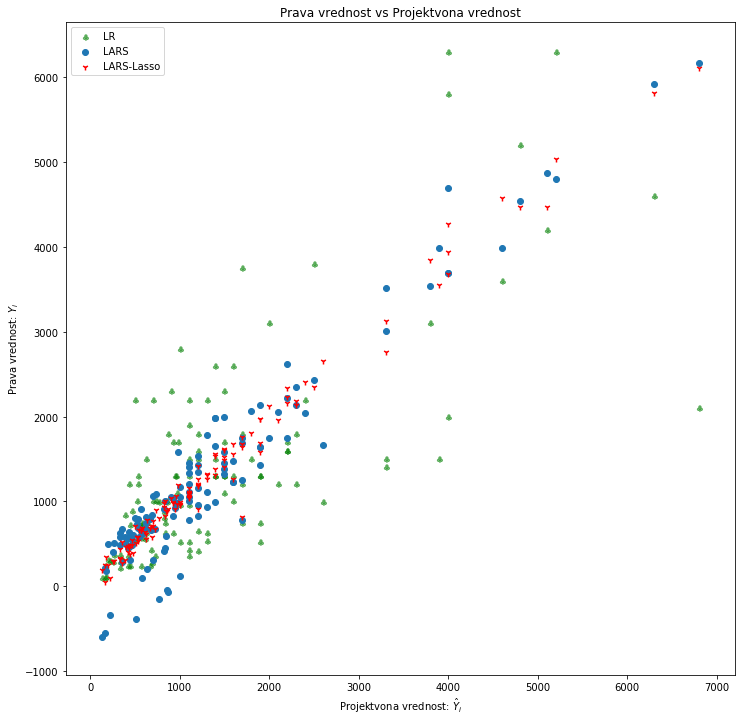

In [21]:
plt.scatter(y_test, y_pred_lr, label='LR',c="g", alpha=0.5, marker=r'$\clubsuit$')
plt.scatter(y_test, y_pred_lars, label='LARS')
plt.scatter(y_test, y_pred_Lasso_lars,label='LARS-Lasso', c="r", marker="1")
plt.xlabel("Projektvona vrednost: $\hat{Y}_i$")
plt.ylabel("Prava vrednost: $Y_i$")
plt.title("Prava vrednost vs Projektvona vrednost")
plt.gcf().set_size_inches((12,12))
plt.legend(loc="best")
plt.show()

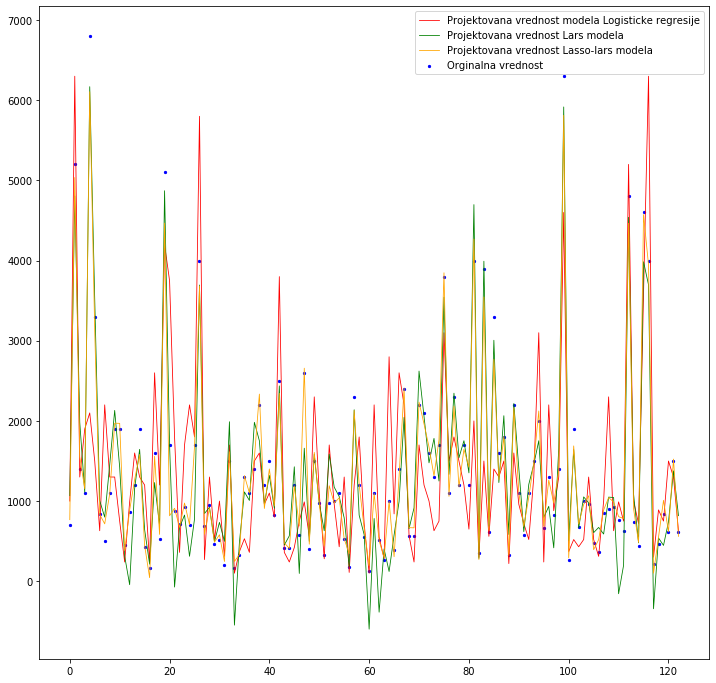

In [22]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="Orginalna vrednost")
plt.plot(x_ax, y_pred_lr, lw=0.8, color="red", label="Projektovana vrednost modela Logisticke regresije")
plt.plot(x_ax, y_pred_lars, lw=0.8, color="green", label="Projektovana vrednost Lars modela")
plt.plot(x_ax, y_pred_Lasso_lars, lw=0.8, color="orange", label="Projektovana vrednost Lasso-lars modela")
plt.legend(loc='best')
plt.gcf().set_size_inches((12,12))
plt.show()

# 

# 

# Model (MinMax Scaler)

In [23]:
lr=linear_model.LogisticRegression(solver='liblinear',max_iter=6000) 
lr.fit(X_train_validation_minmax,y_train_validation)
y_pred_lr=lr.predict(X_test_minmax)

print('Najbolji rezultat modela Logisticke regresije sa validacijom'\
      ,metrics.r2_score(y_test,y_pred_lr))

Najbolji rezultat modela Logisticke regresije sa validacijom 0.3596006984197706


In [25]:
Eps = [0.00001,0.0001,0.001,0.01,0.1,0,1,10,100,1000,10000]

best_score_lars = 0 
best_params_lars = {'eps':0}


# za sve kombinacije eps
for eps in Eps:
    # vrsimo ocenu modela na uniji trening i validacionog skupa koriscenjem 10-struke unakrsne validacije
    lars = linear_model.LarsCV(eps=eps,normalize=False,cv=10)
    lars_pipeline = pipeline.make_pipeline(minmax, lars)
    lars_pipeline.fit(X_train_minmax,y_train)
    score = lars_pipeline.score(X_validation_minmax,y_validation)

    # ukoliko je dobijeni skor najbolji, pamtimo njegovu vrednost i vrednost parametara
    if score > best_score_lars: 
        best_score_lars = score
        best_params_lars['eps'] = eps
print('Najbolji rezultat lars modela : ',best_score_lars)
print('Najbolji parametar [eps]: ',best_params_lars['eps'])

Najbolji rezultat lars modela :  0.4902879533319672
Najbolji parametar [eps]:  10


In [26]:
model_lars=linear_model.Lars(eps=best_params_lars['eps'],normalize=False)
model_lars.fit(X_train_validation_minmax,y_train_validation)
y_pred_lars=model_lars.predict(X_test_minmax)
score_lars=model_lars.score(X_test_minmax,y_test)
print('Rezultat lars modela : ',score_lars)

Rezultat lars modela :  0.5431762822087112


# 

In [29]:
Eps = [0.00001,0.0001,0.001,0.01,0.1,0,1,10,100,1000,10000]#np.array([10**i for i in range(-5, 5)])

best_score_lasso = 0 
best_params_lasso = {'alpha':0}


# za sve kombinacije Eps
for eps in Eps:
    # vrsimo ocenu modela na uniji trening i validacionog skupa koriscenjem 10-struke unakrsne validacije
    lasso = linear_model.LassoLarsCV(eps=eps,cv=10)
    lasso_pipeline = pipeline.make_pipeline(minmax,lasso)
    lasso_pipeline.fit(X_validation_minmax,y_validation)
    score =lasso_pipeline.score(X_validation_minmax,y_validation)



    # ukoliko je dobijeni skor najbolji, pamtimo njegovu vrednost i vrednost parametara
    if score > best_score_lasso: 
        best_score_lasso = score
        best_params_lasso['eps'] = eps
print('Najbolji rezultat Lasso-lars modela : ',best_score_lasso)
print('Najbolji parametar [eps]: ',best_params_lasso['eps'])

Najbolji rezultat Lasso-lars modela :  0.9849593297544177
Najbolji parametar [eps]:  1


In [30]:
model_Lasso_lars=linear_model.LassoLars(alpha=best_params_lasso['alpha'])
model_Lasso_lars.fit(X_train_validation_minmax,y_train_validation)
y_pred_Lasso_lars=model_Lasso_lars.predict(X_test_minmax)
score_lasso=model_Lasso_lars.score(X_test_minmax,y_test)
print('Rezultat Lasso-lars modela : ',score_lasso)

Rezultat Lasso-lars modela :  0.9808319919759373


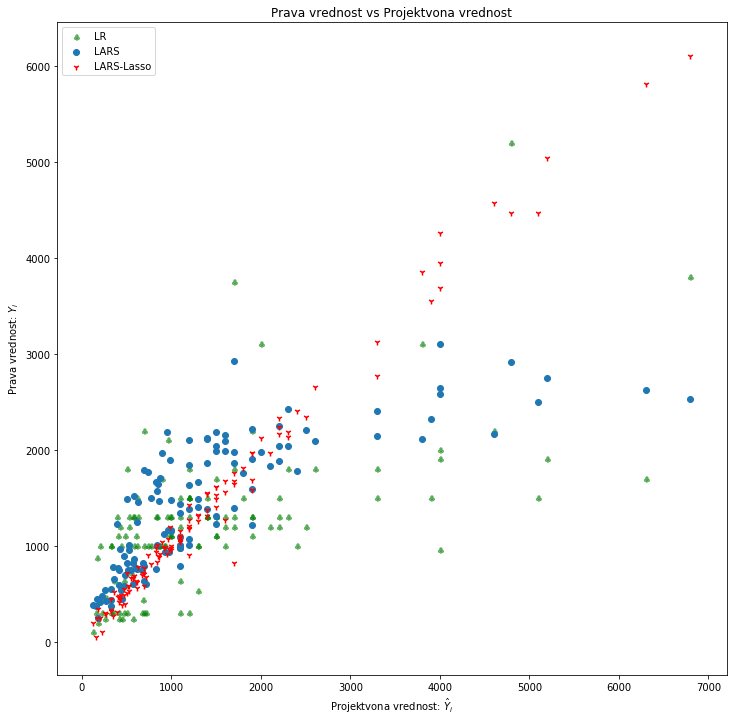

In [31]:
plt.scatter(y_test, y_pred_lr, label='LR',c="g", alpha=0.5, marker=r'$\clubsuit$')
plt.scatter(y_test, y_pred_lars, label='LARS')
plt.scatter(y_test, y_pred_Lasso_lars,label='LARS-Lasso', c="r", marker="1")
plt.xlabel("Projektvona vrednost: $\hat{Y}_i$")
plt.ylabel("Prava vrednost: $Y_i$")
plt.title("Prava vrednost vs Projektvona vrednost")
plt.gcf().set_size_inches((12,12))
plt.legend(loc="best")
plt.show()

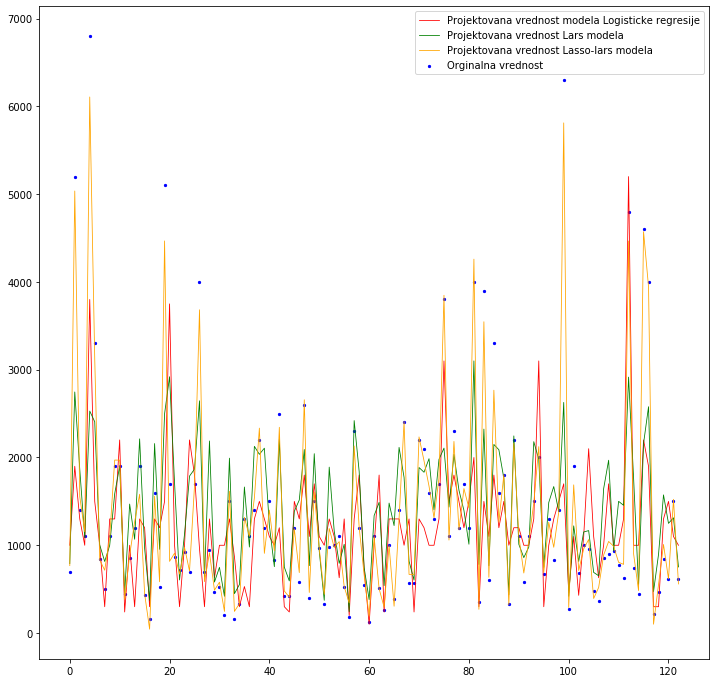

In [32]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="Orginalna vrednost")
plt.plot(x_ax, y_pred_lr, lw=0.8, color="red", label="Projektovana vrednost modela Logisticke regresije")
plt.plot(x_ax, y_pred_lars, lw=0.8, color="green", label="Projektovana vrednost Lars modela")
plt.plot(x_ax, y_pred_Lasso_lars, lw=0.8, color="orange", label="Projektovana vrednost Lasso-lars modela")
plt.legend(loc='best')
plt.gcf().set_size_inches((12,12))
plt.show()

# 

# 

# Model (Robust Scaler)

In [34]:
lr=linear_model.LogisticRegression(solver='liblinear',max_iter=6000) 
lr.fit(X_train_validation_robust,y_train_validation)
y_pred_validation_lr=lr.predict(X_test_robust)
y_pred_lr=lr.predict(X_test_robust)
print('Najbolji rezultat modela Logisticke regresije sa validacijom'\
      ,metrics.r2_score(y_test,y_pred_lr))

Najbolji rezultat modela Logisticke regresije sa validacijom 0.668238062436666


In [35]:
Eps = [0.00001,0.0001,0.001,0.01,0.1,0,1,10,100,1000,10000]

best_score_lars = 0 
best_params_lars = {'eps':0}


# za sve kombinacije eps
for eps in Eps:
    # vrsimo ocenu modela na uniji trening i validacionog skupa koriscenjem 10-struke unakrsne validacije
    lars = linear_model.LarsCV(eps=eps,normalize=False,cv=10)
    lars_pipeline = pipeline.make_pipeline(robust, lars)
    lars_pipeline.fit(X_train_robust,y_train)
    score =lars_pipeline.score(X_validation_robust,y_validation)

    # ukoliko je dobijeni skor najbolji, pamtimo njegovu vrednost i vrednost parametara
    if score > best_score_lars: 
        best_score_lars = score
        best_params_lars['eps'] = eps
print('Najbolji rezultat lars modela : ',best_score_lars)
print('Najbolji parametar [eps]: ',best_params_lars['eps'])

Najbolji rezultat lars modela :  0.9695726867836605
Najbolji parametar [eps]:  10


In [37]:
model_lars=linear_model.Lars(eps=best_params_lars['eps'],normalize=False)
model_lars.fit(X_train_validation_robust,y_train_validation)
y_pred_lars=model_lars.predict(X_test_robust)
score=model_lars.score(X_test_robust,y_test)
print('Rezultat lars modela : ',score)

Rezultat lars modela :  0.9702466628061683


# 

In [38]:
Eps = [0.00001,0.0001,0.001,0.01,0.1,0,1,10,100,1000,10000]

best_score_lasso = 0 
best_params_lasso = {'alpha':0}


# za sve kombinacije Alphe
for eps in Eps:
    # vrsimo ocenu modela na uniji trening i validacionog skupa koriscenjem 10-struke unakrsne validacije
    lasso = linear_model.LassoLarsCV(eps=eps,cv=10)
    lasso_pipeline = pipeline.make_pipeline(robust,lasso)
    lasso_pipeline.fit(X_train_robust,y_train)
    score = lasso_pipeline.score(X_validation_robust,y_validation)


    # ukoliko je dobijeni skor najbolji, pamtimo njegovu vrednost i vrednost parametara
    if score > best_score_lasso: 
        best_score_lasso = score
        best_params_lasso['eps'] = eps
print('Najbolji rezultat Lasso-lars modela : ',best_score_lasso)
print('Najbolji parametar [eps]: ',best_params_lasso['eps'])

Najbolji rezultat Lasso-lars modela :  0.975693488717089
Najbolji parametar [eps]:  1


In [39]:
model_Lasso_lars=linear_model.LassoLars(alpha=best_params_lasso['eps'])
model_Lasso_lars.fit(X_train_validation_robust,y_train_validation)
y_pred_Lasso_lars=model_Lasso_lars.predict(X_test_robust)
score=model_lars.score(X_test_robust,y_test)
print('Rezultat lars modela : ',score)

Rezultat lars modela :  0.9702466628061683


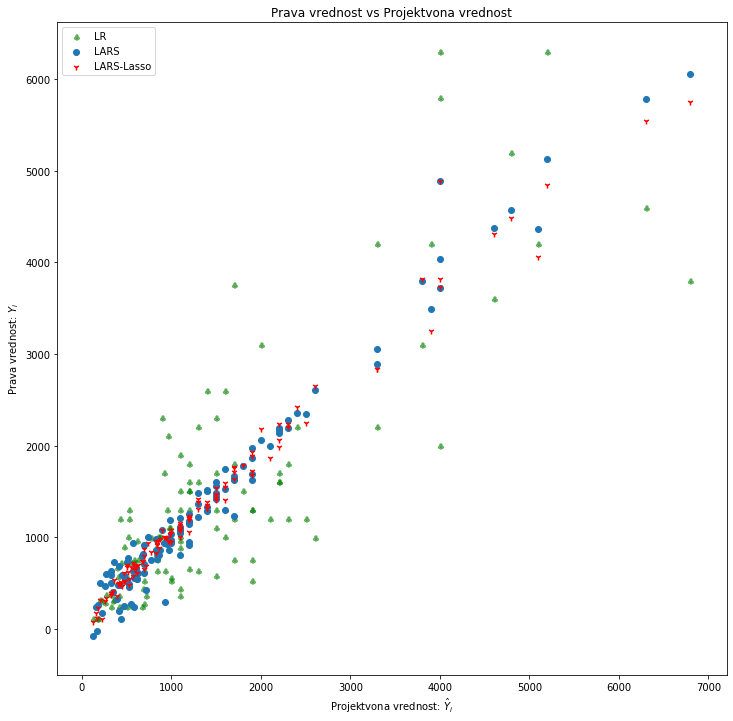

In [40]:
plt.scatter(y_test, y_pred_lr, label='LR',c="g", alpha=0.5, marker=r'$\clubsuit$')
plt.scatter(y_test, y_pred_lars, label='LARS')
plt.scatter(y_test, y_pred_Lasso_lars,label='LARS-Lasso', c="r", marker="1")
plt.xlabel("Projektvona vrednost: $\hat{Y}_i$")
plt.ylabel("Prava vrednost: $Y_i$")
plt.title("Prava vrednost vs Projektvona vrednost")
plt.gcf().set_size_inches((12,12))
plt.legend(loc="best")
plt.show()

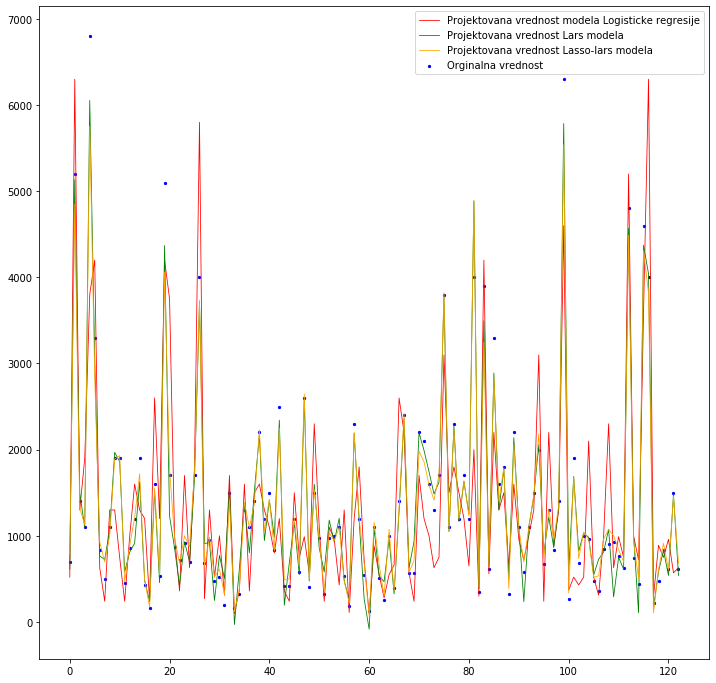

In [41]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="Orginalna vrednost")
plt.plot(x_ax, y_pred_lr, lw=0.8, color="red", label="Projektovana vrednost modela Logisticke regresije")
plt.plot(x_ax, y_pred_lars, lw=0.8, color="green", label="Projektovana vrednost Lars modela")
plt.plot(x_ax, y_pred_Lasso_lars, lw=0.8, color="orange", label="Projektovana vrednost Lasso-lars modela")
plt.legend(loc='best')
plt.gcf().set_size_inches((12,12))
plt.show()